In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from scipy import stats

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull
from pyspark.sql.types import *

In [3]:
spark = SparkSession.builder.master("yarn").config('spark.executor.instances','10').appName("littlemow1").getOrCreate()

In [4]:
df_tb2_1 = spark.read.csv("/user/spark/share/output/table2/lovefengyi/table_2_f99.csv",header=True)

In [5]:
df_tb2_1.count()

26557961

In [6]:
df_tb2_1.agg({"clk":"sum"}).show()

+---------+
| sum(clk)|
+---------+
|1366056.0|
+---------+



In [7]:
df_tb2_1.select('user').groupby('user').count().show()

+------+-----+
|  user|count|
+------+-----+
|265028|   81|
|265187|   12|
|272702|    6|
|287067|   21|
|289164|   12|
|295107|    3|
|320350|  136|
| 32558|   38|
|336362|    3|
|345644|   34|
| 34635|   35|
|364751|   15|
|374258|  134|
|378819|   94|
| 38672|  122|
|388098|    5|
| 38986|   15|
|390667|   18|
|398355|    3|
|404848|    3|
+------+-----+
only showing top 20 rows



In [8]:
df_tb2_1.createOrReplaceTempView("TABLE2_1")

In [9]:
sqlTB2_1=spark.sql("SELECT * FROM TABLE2_1 ")
sqlTB2_1.show()

+-------+----------+----------+-----------+---+-------+-----------+--------+-----+---------+------------+-----------------+---------+------------+--------------+----------+--------------------+------------+----+------+-----+-----+----+------+-----+-----+----+------+-----+-----+---------+
|   user|time_stamp|adgroup_id|        pid|clk|cate_id|campaign_id|customer|price|cms_segid|cms_group_id|final_gender_code|age_level|pvalue_level|shopping_level|occupation|new_user_class_level|   user_cate|pv_1|cart_1|fav_1|buy_1|pv_2|cart_2|fav_2|buy_2|pv_3|cart_3|fav_3|buy_3|brand_New|
+-------+----------+----------+-----------+---+-------+-----------+--------+-----+---------+------------+-----------------+---------+------------+--------------+----------+--------------------+------------+----+------+-----+-----+----+------+-----+-----+----+------+-----+-----+---------+
|1000027|1494494716|    246645|430548_1007|  0|   6208|     195222|  199819| 62.0|        0|           4|                2|        4|

In [10]:
sql_user_count=spark.sql("SELECT count(distinct user) FROM TABLE2_1 ")
sql_user_count.show()

+--------------------+
|count(DISTINCT user)|
+--------------------+
|             1141729|
+--------------------+



In [85]:
sql_user_profile=spark.sql("SELECT user, mean(final_gender_code) as gender, mean(age_level) as age_level, mean(pvalue_level) as pvalue_level, mean(shopping_level) as shopping_level, mean(occupation) as occupation, mean(new_user_class_level) as city_level  FROM TABLE2_1 GROUP BY user")
sql_user_profile.show()

+-------+------------+------------+------------+--------------+------------+------------+
|   user|      gender|   age_level|pvalue_level|shopping_level|  occupation|  city_level|
+-------+------------+------------+------------+--------------+------------+------------+
| 911768|         2.0|         5.0|         2.0|           3.0|         0.0|         3.0|
| 914397|         2.0|         2.0|         1.0|           3.0|         0.0|         2.0|
| 915290|9.99999999E8|9.99999999E8|9.99999999E8|  9.99999999E8|9.99999999E8|9.99999999E8|
| 942375|9.99999999E8|9.99999999E8|9.99999999E8|  9.99999999E8|9.99999999E8|9.99999999E8|
| 952492|         2.0|         4.0|9.99999999E8|           1.0|         0.0|9.99999999E8|
| 959855|9.99999999E8|9.99999999E8|9.99999999E8|  9.99999999E8|9.99999999E8|9.99999999E8|
| 961483|         2.0|         5.0|         2.0|           3.0|         0.0|         3.0|
| 963643|         2.0|         4.0|9.99999999E8|           3.0|         0.0|         2.0|
| 965348| 

In [93]:
sql_user_profile.select("city_level").distinct().show()

+------------+
|  city_level|
+------------+
|         1.0|
|         4.0|
|         3.0|
|         2.0|
|9.99999999E8|
+------------+



In [94]:
sql_user_profile.count()

1141729

In [134]:
user_age_level=sql_user_profile.select('age_level').groupby('age_level').count().sort('age_level',ascending=True)

In [135]:
user_age_level.show()

+------------+------+
|   age_level| count|
+------------+------+
|         0.0|   501|
|         1.0| 65568|
|         2.0|189617|
|         3.0|307340|
|         4.0|261751|
|         5.0|214462|
|         6.0| 22529|
|9.99999999E8| 79961|
+------------+------+



In [136]:
user_age_level=user_age_level.na.replace({9.99999999E8:999})

In [137]:
user_age_level.show()

+---------+------+
|age_level| count|
+---------+------+
|      0.0|   501|
|      1.0| 65568|
|      2.0|189617|
|      3.0|307340|
|      4.0|261751|
|      5.0|214462|
|      6.0| 22529|
|    999.0| 79961|
+---------+------+



In [138]:
user_age_level.printSchema()

root
 |-- age_level: double (nullable = true)
 |-- count: long (nullable = true)



In [139]:
user_age_level=user_age_level.withColumn("age_level",user_age_level["age_level"].cast(StringType()))

In [140]:
user_age_level.printSchema()

root
 |-- age_level: string (nullable = true)
 |-- count: long (nullable = true)



In [141]:
user_age_level=user_age_level.na.replace(['0.0','1.0','2.0','3.0','4.0','5.0','6.0'],['0','1','2','3','4','5','6'],'age_level')

In [143]:
user_age_level=user_age_level.na.replace({'999.0':'unknown'})

In [144]:
user_age_level.show()

+---------+------+
|age_level| count|
+---------+------+
|        0|   501|
|        1| 65568|
|        2|189617|
|        3|307340|
|        4|261751|
|        5|214462|
|        6| 22529|
|  unknown| 79961|
+---------+------+



In [145]:
user_age_level_pa=user_age_level.toPandas()

In [146]:
user_age_level_pa_x=user_age_level_pa['age_level'].tolist()
user_age_level_pa_y=user_age_level_pa['count'].tolist()

Text(0.5, 0, 'age_level')

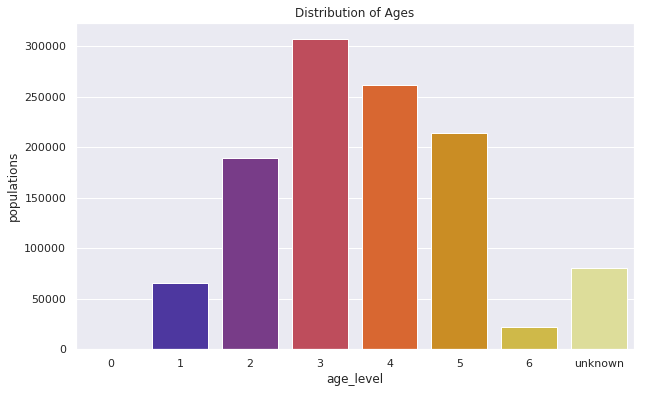

In [148]:
plt.figure(figsize=(10,6))
sns.barplot( user_age_level_pa_x, user_age_level_pa_y, palette="CMRmap") 
plt.title('Distribution of Ages')
plt.ylabel('populations')
plt.xlabel('age_level')

In [149]:
user_pvalue_level=sql_user_profile.select('pvalue_level').groupby('pvalue_level').count().sort('pvalue_level',ascending=True)

In [150]:
user_pvalue_level.show()

+------------+------+
|pvalue_level| count|
+------------+------+
|         1.0|154436|
|         2.0|293656|
|         3.0| 37759|
|9.99999999E8|655878|
+------------+------+



In [151]:
user_pvalue_level=user_pvalue_level.na.replace({9.99999999E8:999})

In [152]:
user_pvalue_level.show()

+------------+------+
|pvalue_level| count|
+------------+------+
|         1.0|154436|
|         2.0|293656|
|         3.0| 37759|
|       999.0|655878|
+------------+------+



In [153]:
user_pvalue_level=user_pvalue_level.withColumn("pvalue_level",user_pvalue_level["pvalue_level"].cast(StringType()))

In [154]:
user_pvalue_level.printSchema()

root
 |-- pvalue_level: string (nullable = true)
 |-- count: long (nullable = true)



In [155]:
user_pvalue_level=user_pvalue_level.na.replace(['1.0','2.0','3.0','999.0'],['1','2','3','unknown'],'pvalue_level')

In [156]:
user_pvalue_level.show()

+------------+------+
|pvalue_level| count|
+------------+------+
|           1|154436|
|           2|293656|
|           3| 37759|
|     unknown|655878|
+------------+------+



In [157]:
user_pvalue_level_pa=user_pvalue_level.toPandas()

In [158]:
user_pvalue_level_pa_x=user_pvalue_level_pa['pvalue_level'].tolist()
user_pvalue_level_pa_y=user_pvalue_level_pa['count'].tolist()

Text(0.5, 0, 'pvalue_level')

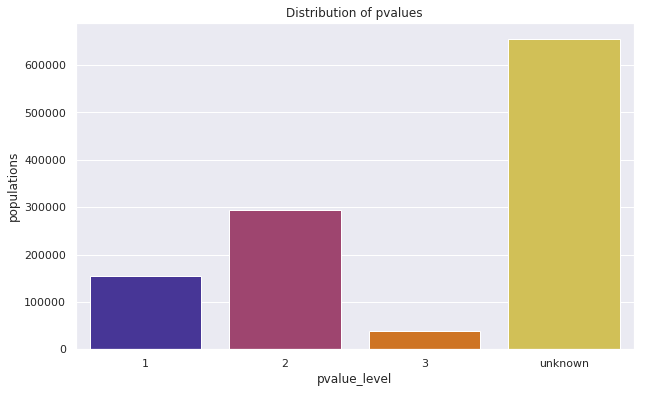

In [159]:
plt.figure(figsize=(10,6))
sns.barplot( user_pvalue_level_pa_x, user_pvalue_level_pa_y, palette="CMRmap") 
plt.title('Distribution of pvalues')
plt.ylabel('populations')
plt.xlabel('pvalue_level')

In [160]:
user_shopping_level=sql_user_profile.select('shopping_level').groupby('shopping_level').count().sort('shopping_level',ascending=True)

In [161]:
user_shopping_level.show()

+--------------+------+
|shopping_level| count|
+--------------+------+
|           1.0| 74612|
|           2.0|151411|
|           3.0|835745|
|  9.99999999E8| 79961|
+--------------+------+



In [162]:
user_shopping_level=user_shopping_level.na.replace({9.99999999E8:999})

In [163]:
user_shopping_level.show()

+--------------+------+
|shopping_level| count|
+--------------+------+
|           1.0| 74612|
|           2.0|151411|
|           3.0|835745|
|         999.0| 79961|
+--------------+------+



In [164]:
user_shopping_level=user_shopping_level.withColumn("shopping_level",user_shopping_level["shopping_level"].cast(StringType()))

In [165]:
user_shopping_level.printSchema()

root
 |-- shopping_level: string (nullable = true)
 |-- count: long (nullable = true)



In [166]:
user_shopping_level=user_shopping_level.na.replace(['1.0','2.0','3.0','999.0'],['1','2','3','unknown'],'shopping_level')

In [167]:
user_shopping_level.show()

+--------------+------+
|shopping_level| count|
+--------------+------+
|             1| 74612|
|             2|151411|
|             3|835745|
|       unknown| 79961|
+--------------+------+



In [168]:
user_shopping_level_pa=user_shopping_level.toPandas()

In [169]:
user_shopping_level_pa_x=user_shopping_level_pa['shopping_level'].tolist()
user_shopping_level_pa_y=user_shopping_level_pa['count'].tolist()

Text(0.5, 0, 'shopping_level')

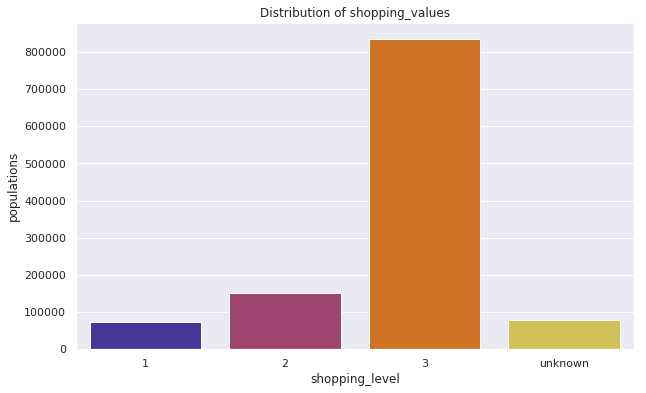

In [170]:
plt.figure(figsize=(10,6))
sns.barplot( user_shopping_level_pa_x, user_shopping_level_pa_y, palette="CMRmap") 
plt.title('Distribution of shopping_values')
plt.ylabel('populations')
plt.xlabel('shopping_level')

In [171]:
user_education=sql_user_profile.select('occupation').groupby('occupation').count().sort('occupation',ascending=True)

In [172]:
user_education.show()

+------------+-------+
|  occupation|  count|
+------------+-------+
|         0.0|1002064|
|         1.0|  59704|
|9.99999999E8|  79961|
+------------+-------+



In [173]:
user_education=user_education.na.replace({9.99999999E8:999})

In [174]:
user_education.show()

+----------+-------+
|occupation|  count|
+----------+-------+
|       0.0|1002064|
|       1.0|  59704|
|     999.0|  79961|
+----------+-------+



In [175]:
user_education=user_education.withColumn("occupation",user_education["occupation"].cast(StringType()))

In [176]:
user_education.printSchema()

root
 |-- occupation: string (nullable = true)
 |-- count: long (nullable = true)



In [177]:
user_education=user_education.na.replace(['0.0','1.0','999.0'],['not-college student','college student','unknown'],'occupation')

In [178]:
user_education.show()

+-------------------+-------+
|         occupation|  count|
+-------------------+-------+
|not-college student|1002064|
|    college student|  59704|
|            unknown|  79961|
+-------------------+-------+



In [179]:
user_education_pa=user_education.toPandas()

In [180]:
user_education_pa_x=user_education_pa['occupation'].tolist()
user_education_pa_y=user_education_pa['count'].tolist()

Text(0.5, 0, 'whether college student?')

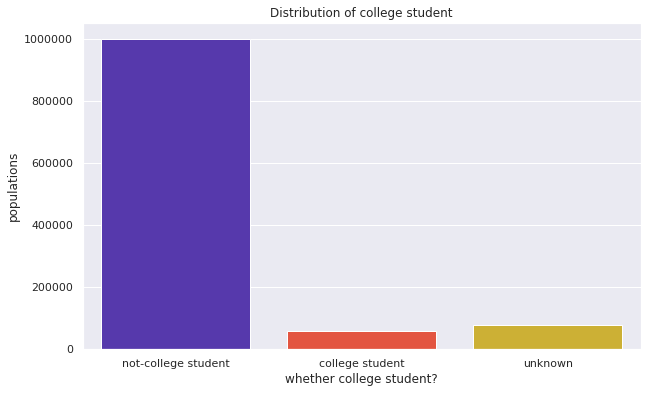

In [181]:
plt.figure(figsize=(10,6))
sns.barplot( user_education_pa_x, user_education_pa_y, palette="CMRmap",) 
plt.title('Distribution of college student')
plt.ylabel('populations')
plt.xlabel('whether college student?')

In [182]:
user_city_level=sql_user_profile.select('city_level').groupby('city_level').count().sort('city_level',ascending=True)

In [183]:
user_city_level.show()

+------------+------+
|  city_level| count|
+------------+------+
|         1.0| 80548|
|         2.0|324420|
|         3.0|173047|
|         4.0|138833|
|9.99999999E8|424881|
+------------+------+



In [184]:
user_city_level=user_city_level.na.replace({9.99999999E8:999})

In [185]:
user_city_level.show()

+----------+------+
|city_level| count|
+----------+------+
|       1.0| 80548|
|       2.0|324420|
|       3.0|173047|
|       4.0|138833|
|     999.0|424881|
+----------+------+



In [186]:
user_city_level=user_city_level.withColumn("city_level",user_city_level["city_level"].cast(StringType()))

In [187]:
user_city_level.printSchema()

root
 |-- city_level: string (nullable = true)
 |-- count: long (nullable = true)



In [190]:
user_city_level=user_city_level.na.replace(['1.0','2.0','3.0','4.0','999.0'],['1','2','3','4','unknown'],'city_level')

In [191]:
user_city_level.show()

+----------+------+
|city_level| count|
+----------+------+
|         1| 80548|
|         2|324420|
|         3|173047|
|         4|138833|
|   unknown|424881|
+----------+------+



In [192]:
user_city_level_pa=user_city_level.toPandas()

In [193]:
user_city_level_pa_x=user_city_level_pa['city_level'].tolist()
user_city_level_pa_y=user_city_level_pa['count'].tolist()

Text(0.5, 0, 'city_level')

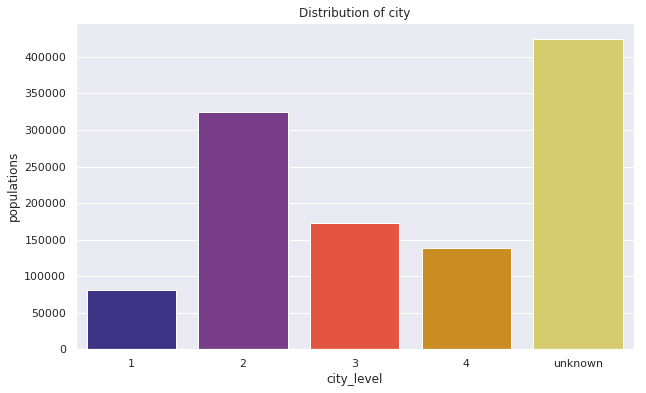

In [195]:
plt.figure(figsize=(10,6))
sns.barplot( user_city_level_pa_x, user_city_level_pa_y, palette="CMRmap",) 
plt.title('Distribution of city')
plt.ylabel('populations')
plt.xlabel('city_level')

In [201]:
sql_user_profile.show()

+-------+------------+------------+------------+--------------+------------+------------+
|   user|      gender|   age_level|pvalue_level|shopping_level|  occupation|  city_level|
+-------+------------+------------+------------+--------------+------------+------------+
|1009562|         2.0|         2.0|         2.0|           3.0|         1.0|         3.0|
|1016518|         2.0|         3.0|         2.0|           2.0|         0.0|9.99999999E8|
|1019329|9.99999999E8|9.99999999E8|9.99999999E8|  9.99999999E8|9.99999999E8|9.99999999E8|
|1024757|         2.0|         3.0|         2.0|           3.0|         0.0|         2.0|
|1037103|         2.0|         3.0|9.99999999E8|           3.0|         0.0|         1.0|
|1061977|9.99999999E8|9.99999999E8|9.99999999E8|  9.99999999E8|9.99999999E8|9.99999999E8|
|1073482|         2.0|         4.0|9.99999999E8|           3.0|         0.0|         2.0|
|1074070|         1.0|         4.0|         2.0|           3.0|         0.0|         2.0|
|1074159| 

In [204]:
user_profile_clk =sql_user_profile.join(user_unclk_clk_2,(sql_user_profile.user == user_unclk_clk_2.user) ,'inner')
user_profile_clk.show()

+-------+------+---------+------------+--------------+----------+------------+-------+-----+-----------+---------+
|   user|gender|age_level|pvalue_level|shopping_level|occupation|  city_level|   user|count|unclk_count|clk_count|
+-------+------+---------+------------+--------------+----------+------------+-------+-----+-----------+---------+
| 100010|   2.0|      2.0|9.99999999E8|           3.0|       1.0|         4.0| 100010|    3|          3|        0|
|1000240|   2.0|      4.0|         2.0|           3.0|       0.0|         3.0|1000240|    3|          3|        0|
|1000280|   2.0|      5.0|         2.0|           3.0|       0.0|         2.0|1000280|    3|          3|        0|
|1000665|   2.0|      3.0|         1.0|           3.0|       0.0|         4.0|1000665|   17|         16|        1|
|1000795|   2.0|      2.0|         2.0|           3.0|       0.0|         3.0|1000795|   72|         67|        5|
|1000839|   1.0|      4.0|         2.0|           3.0|       0.0|         3.0|10

In [205]:
user_profile_clk.count()

1141729

In [206]:
user_profile_clk=user_profile_clk.withColumnRenamed('count','sum_unclk_clk')

In [207]:
user_profile_clk.show()

+-------+------+---------+------------+--------------+----------+------------+-------+-------------+-----------+---------+
|   user|gender|age_level|pvalue_level|shopping_level|occupation|  city_level|   user|sum_unclk_clk|unclk_count|clk_count|
+-------+------+---------+------------+--------------+----------+------------+-------+-------------+-----------+---------+
| 100010|   2.0|      2.0|9.99999999E8|           3.0|       1.0|         4.0| 100010|            3|          3|        0|
|1000240|   2.0|      4.0|         2.0|           3.0|       0.0|         3.0|1000240|            3|          3|        0|
|1000280|   2.0|      5.0|         2.0|           3.0|       0.0|         2.0|1000280|            3|          3|        0|
|1000665|   2.0|      3.0|         1.0|           3.0|       0.0|         4.0|1000665|           17|         16|        1|
|1000795|   2.0|      2.0|         2.0|           3.0|       0.0|         3.0|1000795|           72|         67|        5|
|1000839|   1.0|

In [209]:
gender_clk_distr=user_profile_clk.select('gender').where('clk_count!=0').groupby('gender').count()

In [211]:
gender_clk_distr.show()

+------------+------+
|      gender| count|
+------------+------+
|         1.0|137344|
|         2.0|323562|
|9.99999999E8| 30741|
+------------+------+



In [212]:
gender_clk_distr.agg({"count":"sum"}).show()

+----------+
|sum(count)|
+----------+
|    491647|
+----------+



In [213]:
gender_clk_distr=gender_clk_distr.withColumn("gender",gender_clk_distr["gender"].cast(StringType()))

In [214]:
gender_clk_distr.printSchema()

root
 |-- gender: string (nullable = true)
 |-- count: long (nullable = false)



In [222]:
gender_clk_distr=gender_clk_distr.na.replace(['1','2'],['Male','Female'],'gender')

In [223]:
gender_clk_distr.show()

+-------+------+
| gender| count|
+-------+------+
|   Male|137344|
| Female|323562|
|unknown| 30741|
+-------+------+



In [224]:
gender_clk_distr_pa=gender_clk_distr.toPandas()

In [225]:
gender_clk_distr_pa_x=gender_clk_distr_pa['gender'].tolist()
gender_clk_distr_pa_y=gender_clk_distr_pa['count'].tolist()

Text(0.5, 0, 'gender')

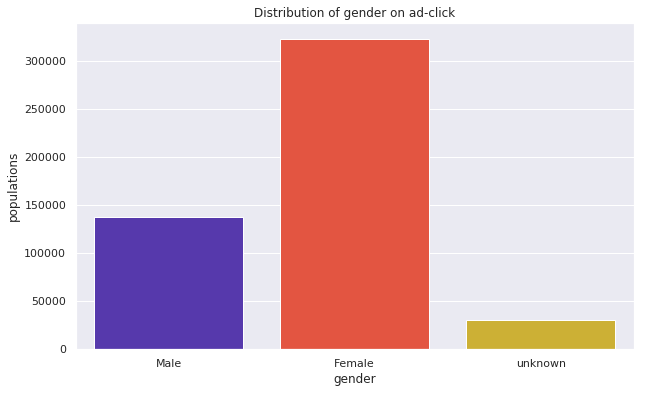

In [226]:
plt.figure(figsize=(10,6))
sns.barplot( gender_clk_distr_pa_x, gender_clk_distr_pa_y, palette="CMRmap",) 
plt.title('Distribution of gender on ad-click')
plt.ylabel('populations')
plt.xlabel('gender')

In [231]:
gender_clk_distr_pa_y1=[137344/377517*100,323562/684251*100,30741/684251*100]
print(gender_clk_distr_pa_y1)

[36.38087821210701, 47.28703355932253, 4.49264962711052]


Text(0.5, 0, 'gender')

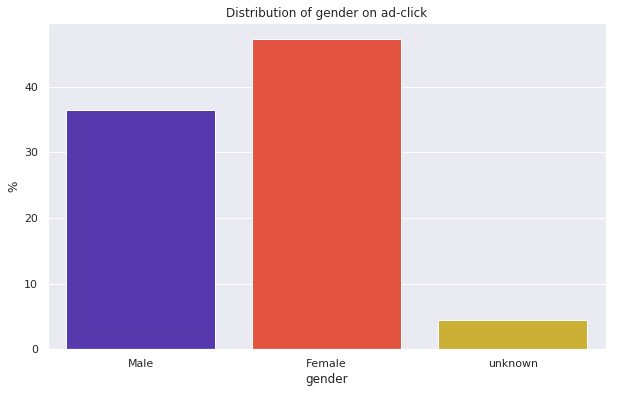

In [233]:
plt.figure(figsize=(10,6))
sns.barplot( gender_clk_distr_pa_x, gender_clk_distr_pa_y1, palette="CMRmap",) 
plt.title('Distribution on ad-click in gender')
plt.ylabel('%')
plt.xlabel('gender')

In [49]:
user_gender_distr=sql_user_profile.select('gender').groupby("gender").count().sort('gender',ascending=True)

In [50]:
user_gender_distr.show()

+------------+------+
|      gender| count|
+------------+------+
|         1.0|377517|
|         2.0|684251|
|9.99999999E8| 79961|
+------------+------+



In [54]:
user_gender_distr1=user_gender_distr.toPandas()

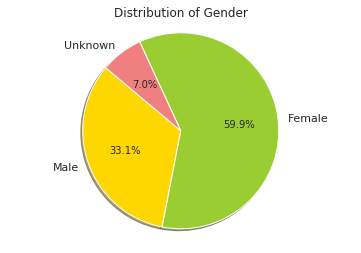

In [62]:
labels = 'Male', 'Female', 'Unknown'
sizes = [377517,684251,79961]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Distribution of Gender')
plt.show()

In [13]:
user_unclk_count=df_tb2_1.select('user').where('clk=0').groupby('user').count()
user_unclk_count.select('user','count').sort('count',ascending=False).show()

+-------+-----+
|   user|count|
+-------+-----+
| 658554| 3669|
| 794330| 3364|
| 557358| 3097|
| 551180| 2992|
| 189185| 2543|
| 945639| 2513|
| 983136| 2510|
|1056557| 2493|
|1080890| 2486|
| 323309| 2362|
| 297960| 2353|
|1009067| 2312|
| 826763| 2282|
| 433096| 2238|
| 570179| 2234|
| 432055| 2220|
| 326341| 2198|
| 941724| 2180|
| 249257| 2149|
| 341347| 2127|
+-------+-----+
only showing top 20 rows



In [14]:
user_unclk_count.summary().show()

+-------+-----------------+-----------------+
|summary|             user|            count|
+-------+-----------------+-----------------+
|  count|          1137376|          1137376|
|   mean|570822.9740209043|22.14914417044144|
| stddev|329591.1108389241|63.30795309545503|
|    min|                1|                1|
|    25%|         285817.0|                3|
|    50%|         571073.0|                6|
|    75%|         856265.0|               19|
|    max|           999999|             3669|
+-------+-----------------+-----------------+



In [15]:
user_profile1=df_tb2_1.select('user').groupby('user').count()

In [16]:
user_profile1.count()

1141729

In [17]:
user_unclk_count.count()

1137376

In [18]:
user_unclk_count=user_unclk_count.withColumnRenamed('user','unclk_user')
user_unclk_count=user_unclk_count.withColumnRenamed('count','unclk_count')
user_unclk_count.sort('unclk_count',ascending=False).show()

+----------+-----------+
|unclk_user|unclk_count|
+----------+-----------+
|    658554|       3669|
|    794330|       3364|
|    557358|       3097|
|    551180|       2992|
|    189185|       2543|
|    945639|       2513|
|    983136|       2510|
|   1056557|       2493|
|   1080890|       2486|
|    323309|       2362|
|    297960|       2353|
|   1009067|       2312|
|    826763|       2282|
|    433096|       2238|
|    570179|       2234|
|    432055|       2220|
|    326341|       2198|
|    941724|       2180|
|    249257|       2149|
|    341347|       2127|
+----------+-----------+
only showing top 20 rows



In [22]:
?user_profile1.join

In [19]:
user_unclk =user_profile1.join(user_unclk_count,(user_unclk_count.unclk_user == user_profile1.user) ,'left_outer')
user_unclk.show()

+-------+-----+----------+-----------+
|   user|count|unclk_user|unclk_count|
+-------+-----+----------+-----------+
| 100010|    3|    100010|          3|
|1000240|    3|   1000240|          3|
|1000280|    3|   1000280|          3|
|1000665|   17|   1000665|         16|
|1000795|   72|   1000795|         67|
|1000839|    7|   1000839|          7|
|1000888|   24|   1000888|         22|
| 100140|    6|    100140|          5|
|1001866|    5|   1001866|          5|
|1002011|   20|   1002011|         16|
|1002185|  272|   1002185|        265|
| 100227|   10|    100227|         10|
|1002442|    3|   1002442|          3|
| 100263|    9|    100263|          8|
|1002783|    3|   1002783|          3|
|1002883|    5|   1002883|          5|
|1002887|   18|   1002887|         17|
| 100320|    6|    100320|          6|
|1003202|    6|   1003202|          6|
|1003366|   36|   1003366|         31|
+-------+-----+----------+-----------+
only showing top 20 rows



In [20]:
user_unclk.count()

1141729

In [21]:
user_unclk=user_unclk.na.fill({'unclk_user':'NULL'})

In [22]:
user_unclk.select("unclk_user").where('unclk_user == "NULL"').show()

+----------+
|unclk_user|
+----------+
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
|      NULL|
+----------+
only showing top 20 rows



In [23]:
user_clk_count=df_tb2_1.select('user').where('clk=1').groupby('user').count()
user_clk_count.select('user','count').sort('count',ascending=False).show()

+-------+-----+
|   user|count|
+-------+-----+
| 928284|  170|
| 569318|  165|
|1060021|  152|
|1054172|  147|
|1058909|  140|
| 490430|  131|
| 853650|  127|
|1005110|  126|
| 529160|  121|
|1096948|  120|
| 220960|  120|
|  40010|  117|
| 413706|  115|
| 401318|  114|
| 525363|  113|
| 143166|  112|
| 432055|  111|
| 728105|  110|
| 341347|  110|
| 373309|  109|
+-------+-----+
only showing top 20 rows



In [24]:
user_clk_count.summary().show()

+-------+-----------------+------------------+
|summary|             user|             count|
+-------+-----------------+------------------+
|  count|           491647|            491647|
|   mean|568215.6743923994|2.7785301242558176|
| stddev|329789.9854768546| 4.031329373032298|
|    min|            10000|                 1|
|    25%|         282610.0|                 1|
|    50%|         565872.0|                 2|
|    75%|         852354.0|                 3|
|    max|           999996|               170|
+-------+-----------------+------------------+



In [25]:
user_clk_count=user_clk_count.withColumnRenamed('user','clk_user')
user_clk_count=user_clk_count.withColumnRenamed('count','clk_count')
user_clk_count.sort('clk_count',ascending=False).show()

+--------+---------+
|clk_user|clk_count|
+--------+---------+
|  928284|      170|
|  569318|      165|
| 1060021|      152|
| 1054172|      147|
| 1058909|      140|
|  490430|      131|
|  853650|      127|
| 1005110|      126|
|  529160|      121|
| 1096948|      120|
|  220960|      120|
|   40010|      117|
|  413706|      115|
|  401318|      114|
|  525363|      113|
|  143166|      112|
|  432055|      111|
|  728105|      110|
|  341347|      110|
|  373309|      109|
+--------+---------+
only showing top 20 rows



In [64]:
user_clk_count.count()

491647

In [27]:
user_unclk_clk =user_unclk.join(user_clk_count,(user_clk_count.clk_user == user_unclk.user) ,'left_outer')
user_unclk_clk.show()

+-------+-----+----------+-----------+--------+---------+
|   user|count|unclk_user|unclk_count|clk_user|clk_count|
+-------+-----+----------+-----------+--------+---------+
| 100010|    3|    100010|          3|    null|     null|
|1000240|    3|   1000240|          3|    null|     null|
|1000280|    3|   1000280|          3|    null|     null|
|1000665|   17|   1000665|         16| 1000665|        1|
|1000795|   72|   1000795|         67| 1000795|        5|
|1000839|    7|   1000839|          7|    null|     null|
|1000888|   24|   1000888|         22| 1000888|        2|
| 100140|    6|    100140|          5|  100140|        1|
|1001866|    5|   1001866|          5|    null|     null|
|1002011|   20|   1002011|         16| 1002011|        4|
|1002185|  272|   1002185|        265| 1002185|        7|
| 100227|   10|    100227|         10|    null|     null|
|1002442|    3|   1002442|          3|    null|     null|
| 100263|    9|    100263|          8|  100263|        1|
|1002783|    3

In [28]:
user_unclk_clk.count()

1141729

In [29]:
user_unclk_clk=user_unclk_clk.na.fill({'clk_user':'NULL','clk_count':0,'unclk_count':0})

In [30]:
user_unclk_clk.show()

+-------+-----+----------+-----------+--------+---------+
|   user|count|unclk_user|unclk_count|clk_user|clk_count|
+-------+-----+----------+-----------+--------+---------+
| 100010|    3|    100010|          3|    NULL|        0|
|1000240|    3|   1000240|          3|    NULL|        0|
|1000280|    3|   1000280|          3|    NULL|        0|
|1000665|   17|   1000665|         16| 1000665|        1|
|1000795|   72|   1000795|         67| 1000795|        5|
|1000839|    7|   1000839|          7|    NULL|        0|
|1000888|   24|   1000888|         22| 1000888|        2|
| 100140|    6|    100140|          5|  100140|        1|
|1001866|    5|   1001866|          5|    NULL|        0|
|1002011|   20|   1002011|         16| 1002011|        4|
|1002185|  272|   1002185|        265| 1002185|        7|
| 100227|   10|    100227|         10|    NULL|        0|
|1002442|    3|   1002442|          3|    NULL|        0|
| 100263|    9|    100263|          8|  100263|        1|
|1002783|    3

In [202]:
user_unclk_clk_2=user_unclk_clk.drop('unclk_user','clk_user')

In [203]:
user_unclk_clk_2.show()

+-------+-----+-----------+---------+
|   user|count|unclk_count|clk_count|
+-------+-----+-----------+---------+
| 100010|    3|          3|        0|
|1000240|    3|          3|        0|
|1000280|    3|          3|        0|
|1000665|   17|         16|        1|
|1000795|   72|         67|        5|
|1000839|    7|          7|        0|
|1000888|   24|         22|        2|
| 100140|    6|          5|        1|
|1001866|    5|          5|        0|
|1002011|   20|         16|        4|
|1002185|  272|        265|        7|
| 100227|   10|         10|        0|
|1002442|    3|          3|        0|
| 100263|    9|          8|        1|
|1002783|    3|          3|        0|
|1002883|    5|          5|        0|
|1002887|   18|         17|        1|
| 100320|    6|          6|        0|
|1003202|    6|          6|        0|
|1003366|   36|         31|        5|
+-------+-----+-----------+---------+
only showing top 20 rows



In [35]:
user_unclk_clk_1.coalesce(1).write.format("csv").save("/user/littlemow/user_unclk_clk.csv",header="true")

In [40]:
user_unclk_clk_1=pd.read_csv("/home/littlemow/user_unclk_clk.csv/user_unclk_clk.csv")

In [41]:
user_unclk_clk_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141729 entries, 0 to 1141728
Data columns (total 4 columns):
user           1141729 non-null int64
count          1141729 non-null int64
unclk_count    1141729 non-null int64
clk_count      1141729 non-null int64
dtypes: int64(4)
memory usage: 34.8 MB


In [43]:
user_unclk_clk_1_x=user_unclk_clk_1['unclk_count'].tolist()
user_unclk_clk_1_y=user_unclk_clk_1['clk_count'].tolist()

Text(0.5, 1.0, 'ad-click record of users')

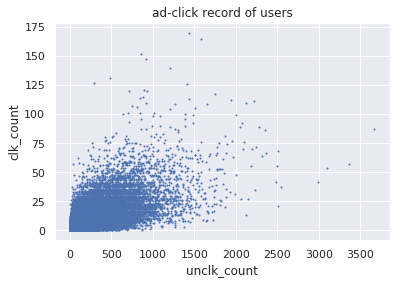

In [48]:
plt.scatter(user_unclk_clk_1_x, user_unclk_clk_1_y, s=1)
plt.ylabel('clk_count')
plt.xlabel('unclk_count')
plt.title('ad-click record of users')

In [63]:
df_tb2_1.select('user','clk').where('final_gender_code == 1').show()

+-------+---+
|   user|clk|
+-------+---+
|1000087|  0|
|1000101|  0|
|1000128|  0|
|1000128|  0|
|1000128|  0|
|1000128|  0|
|1000174|  0|
|1000576|  0|
|1000576|  0|
|1000576|  0|
|1000576|  0|
|1000576|  0|
|1000576|  1|
|1000576|  0|
|1000576|  0|
|1000576|  0|
|1000619|  0|
|1000619|  0|
|1000654|  0|
|1000654|  0|
+-------+---+
only showing top 20 rows



In [66]:
df_tb2_1.printSchema()

root
 |-- user: string (nullable = true)
 |-- time_stamp: string (nullable = true)
 |-- adgroup_id: string (nullable = true)
 |-- pid: string (nullable = true)
 |-- clk: string (nullable = true)
 |-- cate_id: string (nullable = true)
 |-- campaign_id: string (nullable = true)
 |-- customer: string (nullable = true)
 |-- price: string (nullable = true)
 |-- cms_segid: string (nullable = true)
 |-- cms_group_id: string (nullable = true)
 |-- final_gender_code: string (nullable = true)
 |-- age_level: string (nullable = true)
 |-- pvalue_level: string (nullable = true)
 |-- shopping_level: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- new_user_class_level: string (nullable = true)
 |-- user_cate: string (nullable = true)
 |-- pv_1: string (nullable = true)
 |-- cart_1: string (nullable = true)
 |-- fav_1: string (nullable = true)
 |-- buy_1: string (nullable = true)
 |-- pv_2: string (nullable = true)
 |-- cart_2: string (nullable = true)
 |-- fav_2: string (null

In [79]:
df_tb2_1.selectExpr("mean(final_gender_code)").show()

+--------------------------------------+
|avg(CAST(final_gender_code AS DOUBLE))|
+--------------------------------------+
|                  5.7554344689691275E7|
+--------------------------------------+



In [117]:
user_unclk_clk.count()

1141729

In [126]:
user_count=df_tb2_1.select('user').groupby('user').count()
user_count.select('user').count()

1141729

In [141]:
user_count.select('user').where('user == "null"').show()

+----+
|user|
+----+
+----+



In [128]:
user_unclk_clk = user_unclk_clk.join(user_count,(user_unclk_clk.unclk_user == user_count.user ) ,'outer')
user_unclk_clk.show()

+----------+-----------+--------+---------+-------+-----+
|unclk_user|unclk_count|clk_user|clk_count|   user|count|
+----------+-----------+--------+---------+-------+-----+
|    100010|          3|    NULL|        0| 100010|    3|
|   1000240|          3|    NULL|        0|1000240|    3|
|   1000280|          3|    NULL|        0|1000280|    3|
|   1000665|         16| 1000665|        1|1000665|   17|
|   1000795|         67| 1000795|        5|1000795|   72|
|   1000839|          7|    NULL|        0|1000839|    7|
|   1000888|         22| 1000888|        2|1000888|   24|
|    100140|          5|  100140|        1| 100140|    6|
|   1001866|          5|    NULL|        0|1001866|    5|
|   1002011|         16| 1002011|        4|1002011|   20|
|   1002185|        265| 1002185|        7|1002185|  272|
|    100227|         10|    NULL|        0| 100227|   10|
|   1002442|          3|    NULL|        0|1002442|    3|
|    100263|          8|  100263|        1| 100263|    9|
|   1002783|  

In [148]:
?user_unclk_clk.join

In [138]:
user1=user_unclk_clk.select('user').groupby('user').count().sort('user', ascending=False)

In [140]:
user1.select('user','count').sort('count', ascending=False).show()

+------+-----+
|  user|count|
+------+-----+
|  null| 4353|
|886936|    1|
|886953|    1|
|886952|    1|
|886951|    1|
|886950|    1|
| 88695|    1|
|886949|    1|
|886948|    1|
|886947|    1|
|886946|    1|
|886945|    1|
|886944|    1|
|886943|    1|
|886942|    1|
|886941|    1|
|886940|    1|
| 88694|    1|
|886939|    1|
|886938|    1|
+------+-----+
only showing top 20 rows



In [99]:
user_unclk_clk=user_unclk_clk.na.fill({'unclk_user':'NULL'})
user_unclk_clk.where('unclk_user = "NULL"').withColumn('unclk_user','clk_user').show()

AssertionError: col should be Column

TypeError: unhashable type: 'Column'

In [6]:
df_tb2.printSchema()

root
 |-- user: string (nullable = true)
 |-- time_stamp: string (nullable = true)
 |-- adgroup_id: string (nullable = true)
 |-- pid: string (nullable = true)
 |-- clk: string (nullable = true)
 |-- cate_id: string (nullable = true)
 |-- campaign_id: string (nullable = true)
 |-- customer: string (nullable = true)
 |-- price: string (nullable = true)
 |-- cms_segid: string (nullable = true)
 |-- cms_group_id: string (nullable = true)
 |-- final_gender_code: string (nullable = true)
 |-- age_level: string (nullable = true)
 |-- pvalue_level: string (nullable = true)
 |-- shopping_level: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- new_user_class_level: string (nullable = true)
 |-- user_cate: string (nullable = true)
 |-- pv_1: string (nullable = true)
 |-- cart_1: string (nullable = true)
 |-- fav_1: string (nullable = true)
 |-- buy_1: string (nullable = true)
 |-- pv_2: string (nullable = true)
 |-- cart_2: string (nullable = true)
 |-- fav_2: string (null

In [7]:
null_cnt = []
for col in df_tb2.columns:
    isnull_c = df_tb2.filter(isnull(col)).count()
    NULL_c = df_tb2.filter(df_tb2[col]=='NULL').count()
    null_cnt.append(isnull_c+NULL_c)
    print(isnull_c,"&",NULL_c," ----> ",col)

0 & 0  ---->  user
0 & 0  ---->  time_stamp
0 & 0  ---->  adgroup_id
0 & 0  ---->  pid
0 & 0  ---->  clk
0 & 0  ---->  cate_id
0 & 0  ---->  campaign_id
0 & 0  ---->  customer
0 & 0  ---->  price
0 & 0  ---->  cms_segid
0 & 0  ---->  cms_group_id
0 & 0  ---->  final_gender_code
0 & 0  ---->  age_level
0 & 0  ---->  pvalue_level
0 & 0  ---->  shopping_level
0 & 0  ---->  occupation
0 & 0  ---->  new_user_class_level
0 & 0  ---->  user_cate
0 & 0  ---->  pv_1
0 & 0  ---->  cart_1
0 & 0  ---->  fav_1
0 & 0  ---->  buy_1
0 & 0  ---->  pv_2
0 & 0  ---->  cart_2
0 & 0  ---->  fav_2
0 & 0  ---->  buy_2
0 & 0  ---->  pv_3
0 & 0  ---->  cart_3
0 & 0  ---->  fav_3
0 & 0  ---->  buy_3
0 & 0  ---->  brand_New


In [8]:
dist_age_level = df_tb2.select('age_level').groupby('age_level').count().sort('age_level', ascending=True)

In [9]:
dist_age_level.show()

+---------+-------+
|age_level|  count|
+---------+-------+
|        0|   9189|
|        1|1379703|
|        2|4567837|
|        3|7573614|
|        4|6406045|
|        5|4652618|
|        6| 440429|
|999999999|1528526|
+---------+-------+



In [10]:
dist_age_level = dist_age_level.toPandas()
dist_age_level_x = dist_age_level['age_level'].tolist()
dist_age_level_y = dist_age_level['count'].tolist()
print(dist_age_level_x)
print(dist_age_level_y)

['0', '1', '2', '3', '4', '5', '6', '999999999']
[9189, 1379703, 4567837, 7573614, 6406045, 4652618, 440429, 1528526]


Text(0.5, 0, 'User')

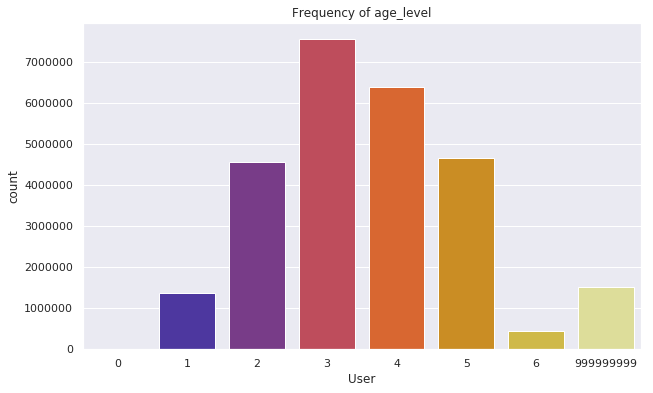

In [11]:
plt.figure(figsize=(10,6))
sns.barplot( dist_age_level_x, dist_age_level_y, palette="CMRmap") 
plt.title('Frequency of age_level')
plt.ylabel('count')
plt.xlabel('User')

In [12]:
dist_gender = df_tb2.select('final_gender_code').groupby('final_gender_code').count().sort('final_gender_code', ascending=True)
dist_gender.show()

+-----------------+--------+
|final_gender_code|   count|
+-----------------+--------+
|                1| 6880966|
|                2|18148469|
|        999999999| 1528526|
+-----------------+--------+



In [13]:
dist_gender=dist_gender.replace('1', 'male','final_gender_code')
dist_gender=dist_gender.replace('2', 'female','final_gender_code')
dist_gender=dist_gender.replace('999999999', 'none','final_gender_code')

In [14]:
dist_gender.show()

+-----------------+--------+
|final_gender_code|   count|
+-----------------+--------+
|             male| 6880966|
|           female|18148469|
|             none| 1528526|
+-----------------+--------+



In [15]:
dist_gender = dist_gender.toPandas()
dist_gender_x = dist_gender['final_gender_code'].tolist()
dist_gender_y = dist_gender['count'].tolist()

Text(0.5, 0, 'gender')

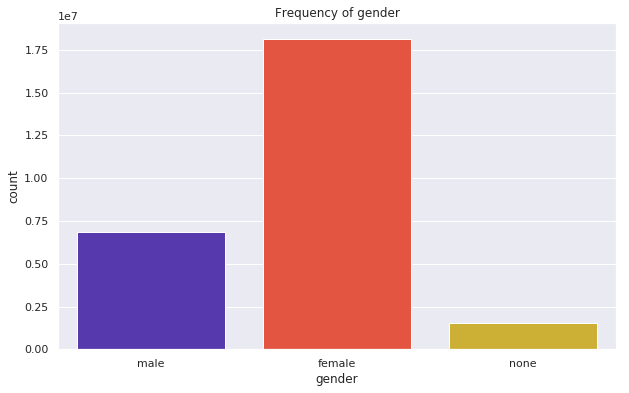

In [16]:
plt.figure(figsize=(10,6))
sns.barplot( dist_gender_x, dist_gender_y, palette="CMRmap") 
plt.title('Frequency of gender')
plt.ylabel('count')
plt.xlabel('gender')

In [17]:
gender_age=df_tb2.select('final_gender_code','age_level').groupby('final_gender_code','age_level').count().sort('final_gender_code','age_level', ascending=True)
gender_age.show()

+-----------------+---------+-------+
|final_gender_code|age_level|  count|
+-----------------+---------+-------+
|                1|        0|   3206|
|                1|        1| 303144|
|                1|        2| 884744|
|                1|        3|1875669|
|                1|        4|2018579|
|                1|        5|1621222|
|                1|        6| 174402|
|                2|        0|   5983|
|                2|        1|1076559|
|                2|        2|3683093|
|                2|        3|5697945|
|                2|        4|4387466|
|                2|        5|3031396|
|                2|        6| 266027|
|        999999999|999999999|1528526|
+-----------------+---------+-------+



In [18]:
gender_age=gender_age.replace('2', 'female','final_gender_code')
gender_age=gender_age.replace('1', 'male','final_gender_code')
gender_age.show()

+-----------------+---------+-------+
|final_gender_code|age_level|  count|
+-----------------+---------+-------+
|             male|        0|   3206|
|             male|        1| 303144|
|             male|        2| 884744|
|             male|        3|1875669|
|             male|        4|2018579|
|             male|        5|1621222|
|             male|        6| 174402|
|           female|        0|   5983|
|           female|        1|1076559|
|           female|        2|3683093|
|           female|        3|5697945|
|           female|        4|4387466|
|           female|        5|3031396|
|           female|        6| 266027|
|        999999999|999999999|1528526|
+-----------------+---------+-------+



In [27]:
gender_age.filter(gender_age.final_gender_code!='999999999').show()

+-----------------+---------+-------+
|final_gender_code|age_level|  count|
+-----------------+---------+-------+
|             male|        0|   3206|
|             male|        1| 303144|
|             male|        2| 884744|
|             male|        3|1875669|
|             male|        4|2018579|
|             male|        5|1621222|
|             male|        6| 174402|
|           female|        0|   5983|
|           female|        1|1076559|
|           female|        2|3683093|
|           female|        3|5697945|
|           female|        4|4387466|
|           female|        5|3031396|
|           female|        6| 266027|
+-----------------+---------+-------+



In [28]:
new_gender_age=gender_age.filter(gender_age.final_gender_code!='999999999')

In [29]:
new_gender_age = new_gender_age.toPandas()

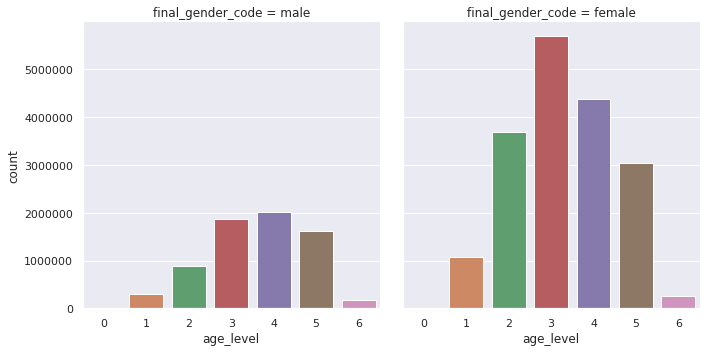

In [30]:
sns.catplot(data=new_gender_age,col="final_gender_code",
            x="age_level",
            y="count",
            kind="bar")

In [88]:
df_tb2=df_tb2.withColumn("time_stamp",df_tb2["time_stamp"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("price",df_tb2["price"].cast(DoubleType()))
df_tb2=df_tb2.withColumn("clk",df_tb2["clk"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("pv_1",df_tb2["pv_1"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("pv_2",df_tb2["pv_2"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("pv_3",df_tb2["pv_3"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("cart_1",df_tb2["cart_1"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("cart_2",df_tb2["cart_2"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("cart_3",df_tb2["cart_3"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("fav_1",df_tb2["fav_1"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("fav_2",df_tb2["fav_2"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("fav_3",df_tb2["fav_3"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("buy_1",df_tb2["buy_1"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("buy_2",df_tb2["buy_2"].cast(IntegerType()))
df_tb2=df_tb2.withColumn("buy_3",df_tb2["buy_3"].cast(IntegerType()))

In [89]:
df_tb2.printSchema()

root
 |-- user: string (nullable = true)
 |-- time_stamp: integer (nullable = true)
 |-- adgroup_id: string (nullable = true)
 |-- pid: string (nullable = true)
 |-- clk: integer (nullable = true)
 |-- cate_id: string (nullable = true)
 |-- campaign_id: string (nullable = true)
 |-- customer: string (nullable = true)
 |-- price: double (nullable = true)
 |-- cms_segid: string (nullable = true)
 |-- cms_group_id: string (nullable = true)
 |-- final_gender_code: string (nullable = true)
 |-- age_level: string (nullable = true)
 |-- pvalue_level: string (nullable = true)
 |-- shopping_level: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- new_user_class_level: string (nullable = true)
 |-- user_cate: string (nullable = true)
 |-- pv_1: integer (nullable = true)
 |-- cart_1: integer (nullable = true)
 |-- fav_1: integer (nullable = true)
 |-- buy_1: integer (nullable = true)
 |-- pv_2: integer (nullable = true)
 |-- cart_2: integer (nullable = true)
 |-- fav_2: inte

In [95]:
df_tb_forcorr=df_tb2.select('time_stamp','clk','price','pv_1','cart_1','fav_1','buy_1','pv_2','cart_2','fav_2','buy_2','pv_3','cart_3','fav_3','buy_3')

In [96]:
df_tb_forcorr.show()

+----------+---+-----+----+------+-----+-----+----+------+-----+-----+----+------+-----+-----+
|time_stamp|clk|price|pv_1|cart_1|fav_1|buy_1|pv_2|cart_2|fav_2|buy_2|pv_3|cart_3|fav_3|buy_3|
+----------+---+-----+----+------+-----+-----+----+------+-----+-----+----+------+-----+-----+
|1494494716|  0| 62.0|   0|     0|    0|    0|   0|     0|    0|    0|   0|     0|    0|    0|
|1494368981|  0| 63.0|   0|     0|    0|    0|   0|     0|    0|    0|   0|     0|    0|    0|
|1494040741|  0| 39.0|   4|     0|    0|    0|  54|     3|    1|    0|  97|     3|    0|    0|
|1494206862|  0|19.58|   4|     0|    0|    0|  54|     3|    1|    0|  97|     3|    0|    0|
|1494206862|  0|109.0|   4|     0|    0|    0|  54|     3|    1|    0|  97|     3|    0|    0|
|1494220473|  0|139.0|   0|     0|    0|    0|   0|     0|    0|    0|  13|     0|    0|    0|
|1494649077|  0| 99.0|   0|     0|    0|    0|   4|     0|    0|    0|   2|     0|    0|    0|
|1494481248|  0|100.0|   0|     0|    0|    0|   0

In [99]:
for col in df_tb_forcorr.columns:
    corr = df_tb_forcorr.stat.corr('clk',col)
    print(corr, "------>" ,col)

-0.002252234355453912 ------> time_stamp
1.0 ------> clk
0.0003292122408241066 ------> price
0.017376649081635092 ------> pv_1
0.003529369453642056 ------> cart_1
0.007813987186805258 ------> fav_1
0.00047771613211008404 ------> buy_1
0.020575517011502873 ------> pv_2
0.005437666004785848 ------> cart_2
0.00976111057086777 ------> fav_2
0.0020811347253511772 ------> buy_2
0.04852638611548271 ------> pv_3
0.026937026827880156 ------> cart_3
0.023666026846124365 ------> fav_3
0.016124331155443143 ------> buy_3


In [101]:
df_tb2_rela=df_tb_forcorr.select('clk','pv_1','cart_1','fav_1','buy_1','pv_2','cart_2','fav_2','buy_2','pv_3','cart_3','fav_3','buy_3').groupby('clk','pv_1','cart_1','fav_1','buy_1','pv_2','cart_2','fav_2','buy_2','pv_3','cart_3','fav_3','buy_3').count()

In [102]:
df_tb2_rela.show()

+---+----+------+-----+-----+----+------+-----+-----+----+------+-----+-----+-----+
|clk|pv_1|cart_1|fav_1|buy_1|pv_2|cart_2|fav_2|buy_2|pv_3|cart_3|fav_3|buy_3|count|
+---+----+------+-----+-----+----+------+-----+-----+----+------+-----+-----+-----+
|  0|   0|     0|    0|    0|  16|     0|    0|    0|  11|     0|    0|    0|  919|
|  1|   3|     0|    0|    0|   1|     0|    0|    0|   8|     2|    1|    0|    1|
|  0|   2|     0|    0|    0|   1|     0|    0|    0|  10|     0|    0|    0| 1663|
|  0|   8|     0|    0|    0|   1|     0|    0|    0|   3|     0|    0|    0|  864|
|  0| 115|     0|    3|    0|   0|     0|    0|    0| 611|     0|   25|    0|    9|
|  0|   0|     0|    0|    0|  25|     0|    1|    0|   0|     0|    0|    0|  708|
|  0|   9|     0|    0|    0|   0|     0|    0|    0|  14|     0|    0|    0|  443|
|  1|   7|     0|    0|    0|  29|     3|    0|    0|  49|     3|    0|    1|    1|
|  0|  66|     0|    2|    0|   0|     0|    0|    0|  56|     0|    1|    0

In [103]:
df_tb2_rela.count()

1388935

In [105]:
df_tb2_rela1=df_tb_forcorr.select('clk').groupby('clk').count().sort('clk', ascending=True)
df_tb2_rela1.show()

+---+--------+
|clk|   count|
+---+--------+
|  0|25191905|
|  1| 1366056|
+---+--------+



In [110]:
df_tb2_rela2=df_tb2.select('user','pv_3','clk').groupby('user','pv_3','clk').count().sort('user','pv_3','clk', ascending=True)
df_tb2_rela2.show()

+------+----+---+-----+
|  user|pv_3|clk|count|
+------+----+---+-----+
|     1|   2|  0|    2|
|     1|   5|  0|    2|
|    10|   0|  0|    1|
|    10|   4|  0|    1|
|    10|   6|  0|    1|
|   100|   0|  0|    3|
|   100|   2|  0|    4|
|   100|  11|  0|    8|
|  1000|   0|  0|    1|
|  1000|   1|  0|    1|
|  1000|   5|  0|    4|
|  1000|  22|  0|    3|
| 10000|   0|  0|    4|
| 10000|   1|  0|   11|
| 10000|   4|  0|    2|
| 10000|   6|  0|    2|
| 10000|   6|  1|    1|
| 10000|   8|  0|    1|
| 10000|  15|  1|    1|
|100000|   5|  0|    1|
+------+----+---+-----+
only showing top 20 rows



In [112]:
df_tb2.agg({"pv_3":"max"}).show()

+---------+
|max(pv_3)|
+---------+
|     5918|
+---------+



In [122]:
df_tb2.select('pv_3').where("clk = 1").sort('pv_3', ascending=True).show()

+----+
|pv_3|
+----+
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
+----+
only showing top 20 rows

